# **60. 単語ベクトルの読み込みと表示**

In [ ]:
# ライブラリのインストール

! pip install gensim==4.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


In [ ]:
from gensim import models

en_w2v = models.KeyedVectors.load_word2vec_format('drive/MyDrive/nlp100/GoogleNews-vectors-negative300.bin', binary=True)
en_w2v["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# **61. 単語の類似度**

In [ ]:
print("cos(United States, US) = %1.3f" % en_w2v.similarity("United_States", "U.S."))

cos(United States, US) = 0.731


# **62. 類似度の高い単語10件**

In [ ]:
en_w2v.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

# **63. 加法構成性によるアナロジー**

In [ ]:
en_w2v.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

# **64. アナロジーデータでの実験**

In [ ]:
# 3時間かかったので注意
with open("questions-words.txt", "r") as f1, open("nlp100_64.txt", "w") as f2:
    for line in f1:
        line = line.split()
        if line[0] == ":":
            category = line[1]
        else:
            word, vec = en_w2v.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(f'{category} {line[3]} {word} {vec}\n')

# **65. アナロジータスクでの正解率**

In [ ]:
with open("nlp100_64.txt", "r") as f1:
    sem_cnt = 0
    sem_cor = 0
    syn_cnt = 0
    syn_cor = 0
    for line in f1:
        line = line.split()
        if "gram" not in line[0]: # 意味的
            sem_cnt += 1
            if line[1] == line[2]:
                sem_cor += 1
        else:
            syn_cnt += 1
            if line[1] == line[2]: # 文法的
                syn_cor += 1

print(f"意味的アナロジー：{sem_cor/sem_cnt:.3f}")
print(f"文法的アナロジー：{syn_cor/syn_cnt:.3f}") 

意味的アナロジー：0.731
文法的アナロジー：0.740


# **66. WordSimilarity-353での評価**

In [ ]:
! wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
! unzip wordsim353.zip

--2023-05-31 02:52:24--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
ERROR: cannot verify gabrilovich.com's certificate, issued by ‘CN=R3,O=Let's Encrypt,C=US’:
  Issued certificate has expired.
To connect to gabrilovich.com insecurely, use `--no-check-certificate'.
unzip:  cannot find or open wordsim353.zip, wordsim353.zip.zip or wordsim353.zip.ZIP.


In [ ]:
from scipy.stats import spearmanr

w2v = []
human = []
with open("combined.csv", "r") as f:
    next(f) # 1行目（ヘッダ）をスキップする
    for line in f:
        line = line.strip("\n").split(",")
        w2v.append(en_w2v.similarity(line[0], line[1]))
        human.append(line[2])
    correlation, pvalue = spearmanr(w2v, human)
    print(correlation)

# **67. k-meansクラスタリング**

[コピペできる国名・地域、国コードなど 2023年3月](https://copipe.work/tips/countries/)　を利用

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

w2v = []
country_names = []
with open("country_name.txt", "r") as f:
    next(f) # 1行目（ヘッダ）をスキップする
    for line in f:
        line = line.strip("\n").split("\t")
        # 学習済み単語ベクトルに国名が存在しない場合がある
        if line[1] in en_w2v:
            w2v.append(en_w2v[line[1]])
            country_names.append(line[1])

# k-meansクラスタリング
result = KMeans(n_clusters = 5).fit(w2v)

# クラスターごとに国名を表示する
for i in range(5):
    cluster = np.where(result.labels_ == i)[0]
    print('Cluster：',i)
    print(f"{', '.join([country_names[k] for k in cluster])}\n")

Cluster： 0
Iceland, Ireland, Azerbaijan, Albania, Armenia, Andorra, Italy, Ukraine, Estonia, Austria, Netherlands, Kazakhstan, Cyprus, Greece, Croatia, Georgia, Switzerland, Sweden, Slovakia, Slovenia, Serbia, Czechia, Denmark, Germany, Turkey, Norway, Hungary, Finland, France, Bulgaria, Belarus, Belgium, Poland, Malta, Monaco, Montenegro, Latvia, Lithuania, Liechtenstein, Romania, Luxembourg

Cluster： 1
Aruba, Anguilla, Guernsey, Guyana, Curaçao, Kiribati, Guadeloupe, Guam, Grenada, Samoa, Gibraltar, Jamaica, Suriname, Seychelles, Tuvalu, Tokelau, Dominica, Tonga, Nauru, Niue, Haiti, Vanuatu, Bahamas, Bermuda, Palau, Barbados, Pitcairn, Fiji, Belize, Mayotte, Martinique, Mauritius, Maldives, Montserrat, Réunion

Cluster： 2
Afghanistan, Israel, Iraq, India, Indonesia, Uzbekistan, Australia, Oman, Qatar, Canada, Cambodia, Kyrgyzstan, Kuwait, Greenland, Singapore, Thailand, Tajikistan, China, Turkmenistan, Antarctica, Japan, Nepal, Bahrain, Pakistan, Bangladesh, Philippines, Bhutan, Maca

# **68. Ward法によるクラスタリング**

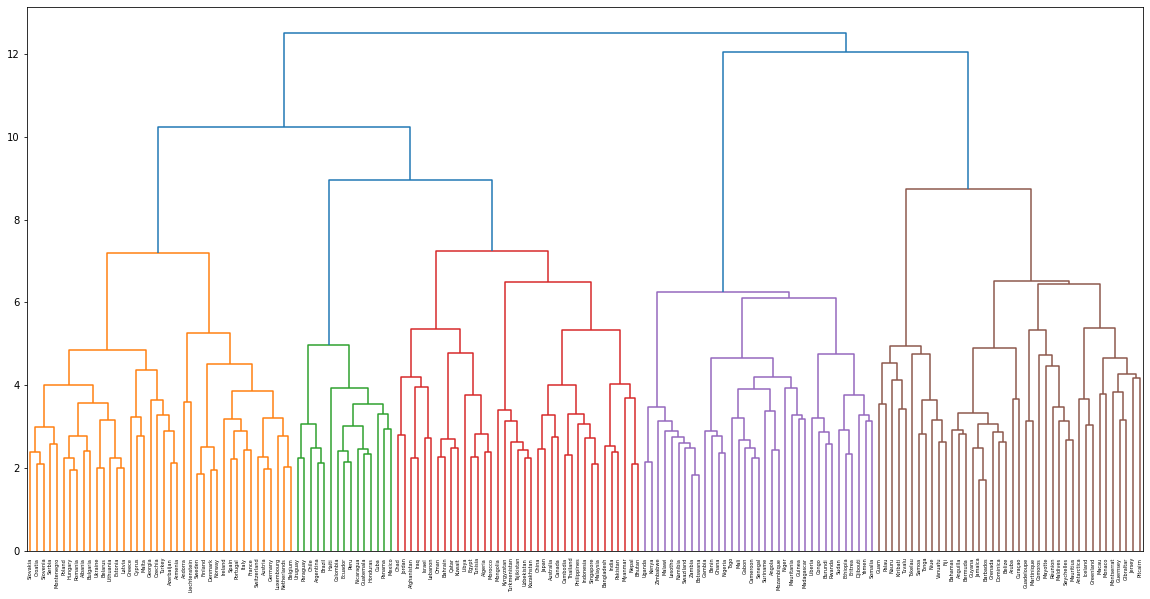

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

w2v = []
country_names = []
with open("country_name.txt", "r") as f:
    next(f) # 1行目（ヘッダ）をスキップする
    for line in f:
        line = line.strip("\n").split("\t")
        # 学習済み単語ベクトルに国名が存在しない場合がある
        if line[1] in en_w2v:
            w2v.append(en_w2v[line[1]])
            country_names.append(line[1])

plt.figure(figsize=(20, 10))
result = linkage(w2v, method='ward', metric='euclidean')
dendrogram(result, labels=country_names)
plt.show()

# **69. t-SNEによる可視化**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


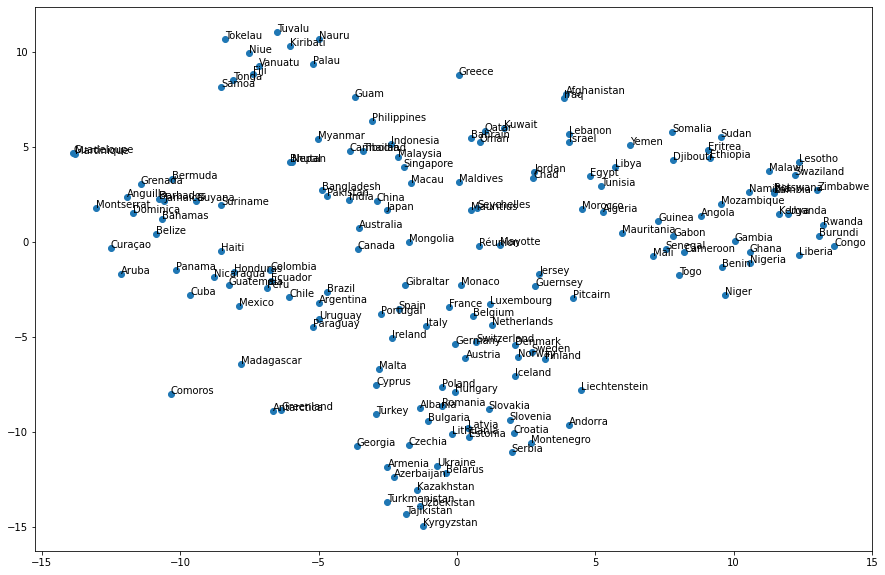

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

w2v = []
country_names = []
with open("country_name.txt", "r") as f:
    next(f) # 1行目（ヘッダ）をスキップする
    for line in f:
        line = line.strip("\n").split("\t")
        # 学習済み単語ベクトルに国名が存在しない場合がある
        if line[1] in en_w2v:
            w2v.append(en_w2v[line[1]])
            country_names.append(line[1])

plt.figure(figsize=(15, 10))
result = TSNE(n_components=2).fit_transform(w2v)
plt.scatter(result.T[0], result.T[1])
for (x, y), name in zip(result, country_names):
    plt.annotate(name, (x, y))
plt.show()